In [1]:
#libraries
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.stats import poisson

In [2]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

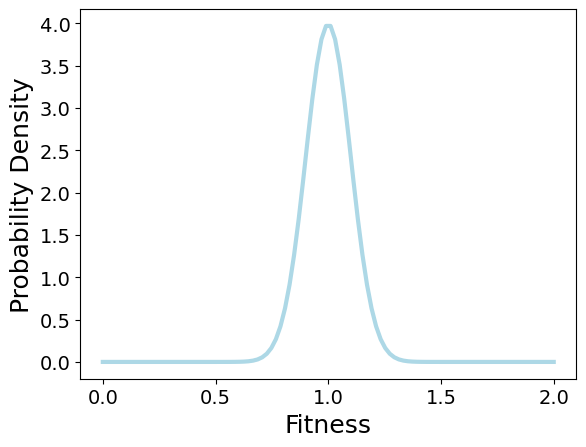

In [84]:
# Define parameters
mean = 1
std_dev = 0.1

# Generate x values
x = np.linspace(0, 2, 100)

# Generate random samples
pdf = norm.pdf(x, mean, std_dev)

# Plot the PDF
plt.plot(x, pdf, color='lightblue')
plt.xlabel('Fitness')
plt.ylabel('Probability Density')
plt.savefig('NormaldistFitness.png', bbox_inches='tight') 

In [76]:
#Defines the fitnes function following Kondrashov 1995 Unconditionally deleterious mutations paper
#w_m is the point where fitness is on its half value
#w_w is the width of the linear drop in fitness from 0 to one

def singleValue_Fitnessfunc(x, w_m, w_w):
    if x <= w_m-w_w/2:
        return 1.0
    elif x < w_m+w_w/2:
        return w_m/w_w - x/w_w + 1/2
    else:
        return 0
    
Value_Fitnessfunc = np.vectorize(singleValue_Fitnessfunc)

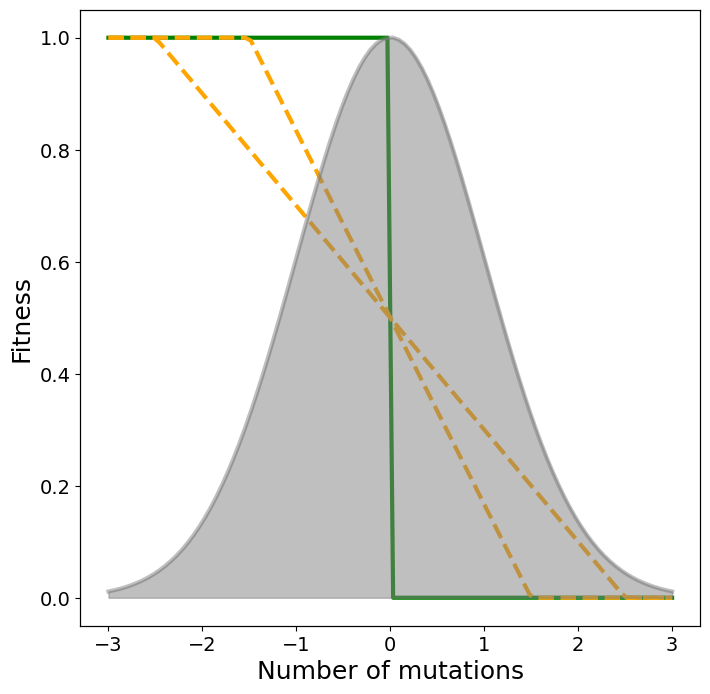

In [97]:
# Define parameters
mean = 0
std_dev = 1
Thresh_w_m = 0
Thresh_w_w = 0

Weak_w_m1 = 0
Weak_w_w1 = 3

Weak_w_m2 = 0
Weak_w_w2 = 5
# Generate x values
x = np.linspace(-3, 3, 100)
ThreshFitness = Value_Fitnessfunc(x, Thresh_w_m, Thresh_w_w)
WeakFitness1 = Value_Fitnessfunc(x, Weak_w_m1, Weak_w_w1)
WeakFitness2 = Value_Fitnessfunc(x, Weak_w_m2, Weak_w_w2)

#Generate random samples
pdf = norm.pdf(x, mean, std_dev)

# Plot the PDF
#plt.plot(x, pdf, color='lightblue')
#plt.ylabel('Probability Density')
COLOR_PMF = "gray"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.plot(x, ThreshFitness, color='green', )
ax1.plot(x, WeakFitness1, color='orange', linestyle='dashed')
ax1.plot(x, WeakFitness2, color='orange', linestyle='dashed')
ax1.set_xlabel('Number of mutations')
ax1.set_ylabel('Fitness')

ax2.plot(x, pdf,  color=COLOR_PMF, alpha=0.5)
ax2.get_yaxis().set_visible(False)
ax2.fill_between(x, pdf, 0, color=COLOR_PMF, alpha=0.5)

fig.savefig('EpistasisFunctions.png', bbox_inches='tight') 

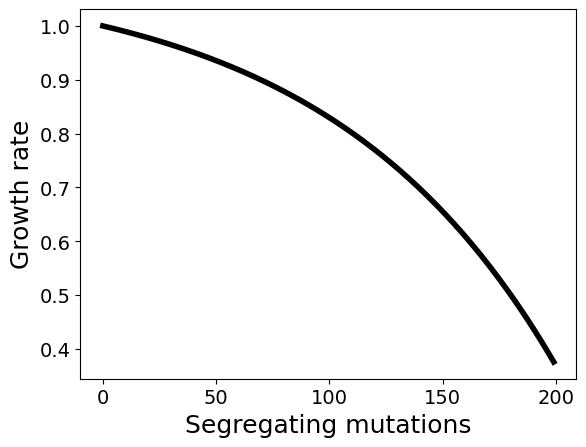

In [23]:
#Work on this
#Plot the Growth rate function for the epistasis model
sd=0.001
R=1.01
xValues = pd.Series(pd.RangeIndex(start=int(0.0), stop=int(200), step=1))
GrowthRates = 1.0-((sd/(R-1.0))*(R**xValues - 1.0))

COLOR_DEATHRATE = "black"

plt.plot(xValues, GrowthRates, color=COLOR_DEATHRATE, lw=4)
plt.ylabel('Growth rate')
plt.xlabel('Segregating mutations')
plt.savefig('Growth_rate_function.png', bbox_inches='tight') 

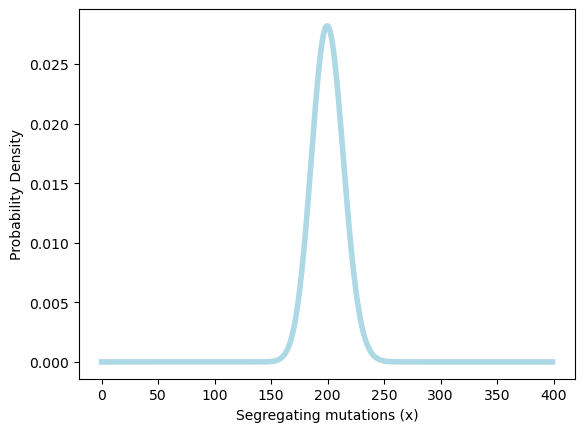

In [11]:
# Define parameters
xmean = 200

# Generate x values
x = np.arange(0, 2*xmean)

# Generate random samples
pmf = poisson.pmf(x, xmean)

# Plot the PDF
plt.plot(x, pmf, color='lightblue', lw=4)
plt.xlabel('Segregating mutations (x)')
plt.ylabel('Probability Density')
plt.savefig('PoissondistFitness.png', bbox_inches='tight') 